# Curso Pandas IO - Aula 1

## Lendo nomes com Json

In [1]:
# Importando a biblioteca do Pandas
import pandas as pd

In [2]:
# Lendo nomes da API de nomes por frequência do IGBE v1 (v2 é diferente) com a função read_json(). Importando 200 nomes 
# femininos
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [3]:
# Lendo nomes da API de nomes por frequência do IGBE v1 (v2 é diferente) com a função read_json(). Importando 200 nomes 
# masculinos
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_m.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [4]:
# Conferindo a quantidade de nomes importados da API. A função str converte o resultado da soma (inteiro) em str
print("A quantidade de nomes : " + str(len(nomes_f) + len(nomes_m)))

A quantidade de nomes : 400


In [5]:
# Criando uma lista com todos os nomes
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [6]:
# Convertendo a lista para um dataframe, mas somente com a coluna de interesse (nome)
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
# A função sample permite analisar amostras aleatórias do dataframe
nomes.sample(5)

,nome
38,DIEGO
94,SABRINA
194,CLARA
92,DIOGO
46,LUCIANO


## Incluindo ID dos alunos

In [8]:
# Importando biblioteca Numpy
import numpy as np

In [9]:
# Para gerar números aleatórios usando a função np.random, setamos uma seed:
np.random.seed(123)

In [10]:
# Obtendo o número total de alunos
total_alunos = len(nomes)
total_alunos

400

In [11]:
# Gerando uma nova coluna no dataframe nomes, chamada 'id_aluno' e atribuindo IDs aleatórios de 0 a 'total_alunos' - 1 com a 
# função permutation. O '+1' no final faz com que os valores sejam 'shiftados' para o intervalo de 1 a 'total_alunos'.
nomes['id_aluno'] = np.random.permutation(total_alunos)+1
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
# Gerando um conjunto de domínios para associar aleatoriamente aos alunos. A função choice escolhe aleatoriamente n valores 
# de uma lista, onde n corresponde ao segundo argumento passado.
dominios = ['@gmail.com', '@outlook.com', '@uol.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
135,RUBENS,256,@gmail.com
53,ELAINE,233,@gmail.com
45,ADRIANO,196,@gmail.com
36,ROBERTO,364,@uol.com.br
42,MARLENE,268,@uol.com.br


In [13]:
# Para gerar o email combinamos as colunas 'nome' e 'dominio' do dataframe nomes por meio da função cat. Convertemos domínio
# para string (str) e fazemos com que todas as letras sejam minúsculas (str.lower()). Os emails são salvos na nova coluna
# 'email'.
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
151,JOSUE,393,@outlook.com,josue@outlook.com
18,VANESSA,42,@gmail.com,vanessa@gmail.com
180,LIDIA,167,@outlook.com,lidia@outlook.com
152,LARA,160,@outlook.com,lara@outlook.com
137,NAIR,129,@uol.com.br,nair@uol.com.br


# Pandas IO - Aula 2

## Criando cursos

### OBS: A princípio, é necessário instalar as bibliotecas html5lib e lxml (!pip3 install html5lib/!pip3 install lxml). No Anaconda, estas bibliotecas já vem instaladas por default. Para verificar, basta ir em environments e é possível ver todos os pacotes já instalados.

In [14]:
# Importando lista de cursos do link do heroku
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')

cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [15]:
# A resposta da função pd.read_html é uma lista, conforme pode ser visto abaixo
type(cursos)

list

In [16]:
# Podemos usar a mesma alternativa utilizada anteriormente para converter a lista para um dataframe, por meio de pd.concat().
# Para usar pd.concat() precisamos selecionar algumas colunas específicas, ou o resultado será de erro, pois pd.concat(cursos)
# por si só já gera um dataframe(o que causa erro em to_frame()).
#cursos = pd.concat(cursos)['Nome do curso'].to_frame()
#cursos.head(5)

In [17]:
# Simplesmente usar pd.concat(cursos) também gera o mesmo resultado
#cursos = pd.concat(cursos)
#cursos.head(5)

In [18]:
# Outra alternativa é utilizando cursos [0]
cursos = cursos[0]
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [19]:
# Conferindo o tipo de cursos
type(cursos)

pandas.core.frame.DataFrame

## Alterando o index

In [20]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [21]:
# Criando uma nova coluna com o id dos cursos 'id_curso'. O id se baseia no index do dataframe, mas começando com o valor 1
cursos['id_curso'] = cursos.index + 1
cursos.head(5)

,nome_do_curso,id_curso
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [22]:
# Alterando o index com a função set_index: agora o índice do dataframe será a variável 'id_curso'
cursos = cursos.set_index('id_curso')
cursos.head(5)

,nome_do_curso
id_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Pandas IO - Aula 3

## Matriculando alunas e alunos

In [23]:
# Serão geradas aleatoriamente dados referente à quantidade de cursos em que cada aluno está matriculado. Os dados são 
# gerados a partir de uma distribuição exponencial : https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html
# O parâmetro astype(int) converte as amostras para inteiro.
# np.ceil(): The ceil of the scalar x is the smallest integer i, such that i >= x.
nomes['cursos_matriculados'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,cursos_matriculados
13,DANIEL,195,@uol.com.br,daniel@uol.com.br,4
195,ROSANE,227,@uol.com.br,rosane@uol.com.br,1
183,IRACI,8,@gmail.com,iraci@gmail.com,3
66,PRISCILA,122,@uol.com.br,priscila@uol.com.br,2
147,ALISSON,315,@outlook.com,alisson@outlook.com,1


In [24]:
# Obtendo estatísticas descritivas sobre os cursos matriculados para cada aluno.
nomes['cursos_matriculados'].describe()

count    400.000000
mean       2.145000
std        1.555643
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: cursos_matriculados, dtype: float64

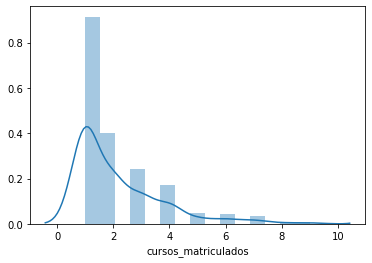

In [25]:
# Importando Seaborn para criação de um histograma
import seaborn as sns

sns.distplot(nomes['cursos_matriculados'])

In [26]:
# Utilizando value_counts() para obter os valores de frequência
nomes['cursos_matriculados'].value_counts()

1    195
2     86
3     52
4     37
5     10
6      9
7      7
9      2
8      2
Name: cursos_matriculados, dtype: int64

In [27]:
# Poderiamos só ter somado 1 para eliminar os 0s
nomes['cursos_matriculados'] = (np.random.exponential(size=total_alunos)*1.5).astype(int)+1
nomes.sample(5)

,nome,id_aluno,dominio,email,cursos_matriculados
5,JULIANA,310,@uol.com.br,juliana@uol.com.br,3
191,ERICK,124,@uol.com.br,erick@uol.com.br,1
1,ANA,43,@gmail.com,ana@gmail.com,2
92,DIOGO,61,@outlook.com,diogo@outlook.com,1
171,VALDEMIR,3,@uol.com.br,valdemir@uol.com.br,1


In [28]:
# Realizando as mesmas análises para comparar a diferença entre os dois métodos
nomes['cursos_matriculados'].describe()

count    400.000000
mean       2.172500
std        1.605986
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: cursos_matriculados, dtype: float64

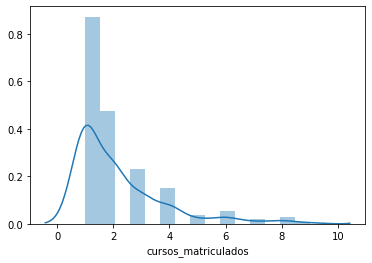

In [29]:
sns.distplot(nomes['cursos_matriculados'])

In [30]:
nomes['cursos_matriculados'].value_counts()

1    186
2    101
3     49
4     32
6     12
5      8
8      6
7      4
9      2
Name: cursos_matriculados, dtype: int64

## Selecionando os cursos

In [31]:
len(cursos)

20

In [32]:
# Vamos atribuir aleatoriamente os cursos à quantidade de cursos em que cada aluno está matriculado. Primeiro, cria-se o 
# vetor vazio todas_matriculas. Depois, temos o cálculo de números aleatórios até a quantidade de cursos existentes e a 
# probabilidade dos números aleatórios
todas_matriculas = []
x = np.random.rand(len(cursos))
prob_x = x / sum(x)

In [33]:
# Vamos percorrer cada linha (iterrows()) do dataframe 'nomes' para verificar em quantos cursos cada aluno está matriculado;
# com base nesse valor atribuimos aleatoriamente os cursos ao aluno. Pegamos o id e a quantidade de cursos matriculados 
# (id e matriculas, respectivamente) e criamos um novo laço. A variável mat cria uma lista com o id e um curso escolhido 
# aleatoriamente de acordo com a probabilidade prob_x. A variável todas_matriculas recebe mat por meio de append, que 
# adiciona elementos ao final da lista. Por fim, cria-se um dataframe matriculas_cursos, renomeando suas colunas para 
# 'id_aluno' e 'id_curso'.
for index, row in nomes.iterrows():
    id = row['id_aluno']
    matriculas = row['cursos_matriculados']
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob_x)]
        todas_matriculas.append(mat)
        
matriculas_cursos = pd.DataFrame(todas_matriculas, columns=['id_aluno','id_curso'])
matriculas_cursos.head(10)

,id_aluno,id_curso
0,235,16
1,43,15
2,43,8
3,304,10
4,304,3
5,156,14
6,343,18
7,310,12
8,310,6
9,310,8


In [34]:
# Agrupando o dataframe pelo id dos cursos ('id_curso') e contando quantos alunos há em cada curso
matriculas_cursos.groupby('id_curso').count()

,id_aluno
id_curso,
1,73
2,21
3,64
4,29
5,8
6,70
7,25
8,54
9,25


In [35]:
# Adicionando a coluna com o nome de cada curso
matriculas_cursos.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,73,Lógica de programação
2,21,Java para Web
3,64,C# para Web
4,29,Ruby on Rails
5,8,Cursos de Python
6,70,PHP com MySql
7,25,.NET para web
8,54,Novas integrações com Java
9,25,TDD com Java


In [36]:
# Renomeando a coluna 'id_aluno' para 'quantidade_de_alunos'
matriculas_cursos.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,73,Lógica de programação
2,21,Java para Web
3,64,C# para Web
4,29,Ruby on Rails
5,8,Cursos de Python
6,70,PHP com MySql
7,25,.NET para web
8,54,Novas integrações com Java
9,25,TDD com Java


In [37]:
# Salvando em um dataframe
matriculas_por_curso = matriculas_cursos.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})
matriculas_por_curso.head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,73,Lógica de programação
2,21,Java para Web
3,64,C# para Web
4,29,Ruby on Rails
5,8,Cursos de Python


## Saídas em diferentes formatos

In [38]:
# Exportando a saída para o formato csv
matriculas_por_curso.to_csv()

'id_curso,quantidade_de_alunos,nome_do_curso\r\n1,73,Lógica de programação\r\n2,21,Java para Web\r\n3,64,C# para Web\r\n4,29,Ruby on Rails\r\n5,8,Cursos de Python\r\n6,70,PHP com MySql\r\n7,25,.NET para web\r\n8,54,Novas integrações com Java\r\n9,25,TDD com Java\r\n10,77,Código limpo com C#\r\n11,17,Preparatório para certificação Java\r\n12,61,Hardware básico\r\n13,17,Persistência com .NET\r\n14,50,Desenvolvendo jogos\r\n15,80,Análise de dados\r\n16,35,Estatística básica\r\n17,73,Internet das coisas\r\n18,20,Programação funcional\r\n19,58,Boas práticas em Java\r\n20,12,Orientação objetos com Java\r\n'

In [39]:
# Salvando em um arquivo e tirando o index
matriculas_por_curso.to_csv('dados/matriculas_por_curso.csv', index = False)

In [40]:
# Conferindo se é possível ler o arquivo 'matriculas_por_curso.csv'
pd.read_csv('dados/matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,73,Lógica de programação
1,21,Java para Web
2,64,C# para Web
3,29,Ruby on Rails
4,8,Cursos de Python
5,70,PHP com MySql
6,25,.NET para web
7,54,Novas integrações com Java
8,25,TDD com Java
9,77,Código limpo com C#


In [41]:
# Exportando para o formato Json
matriculas_por_curso.to_json()

'{"quantidade_de_alunos":{"1":73,"2":21,"3":64,"4":29,"5":8,"6":70,"7":25,"8":54,"9":25,"10":77,"11":17,"12":61,"13":17,"14":50,"15":80,"16":35,"17":73,"18":20,"19":58,"20":12},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [42]:
# Salvando em um arquivo .json
matriculas_por_curso.to_json('dados/matriculas_por_curso.json')

In [43]:
# Conferindo o arquivo 'matriculas_por_curso.json'
pd.read_json('dados/matriculas_por_curso.json')

,quantidade_de_alunos,nome_do_curso
1,73,Lógica de programação
2,21,Java para Web
3,64,C# para Web
4,29,Ruby on Rails
5,8,Cursos de Python
6,70,PHP com MySql
7,25,.NET para web
8,54,Novas integrações com Java
9,25,TDD com Java
10,77,Código limpo com C#


In [44]:
# Exportando para o formato html
matriculas_por_curso.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>73</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>21</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>64</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>29</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>8</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>70</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>25</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>54</td>\n      <td>Novas integrações com Java</td>\n 

In [45]:
# Salvando em um arquivo .html
matriculas_por_curso.to_html('dados/matriculas_por_curso.html', index = False)

In [46]:
# Conferindo o arquivo 'matriculas_por_curso.html'
pd.read_html('dados/matriculas_por_curso.html')

[    quantidade_de_alunos                           nome_do_curso
 0                     73                LÃ³gica de programaÃ§Ã£o
 1                     21                           Java para Web
 2                     64                             C# para Web
 3                     29                           Ruby on Rails
 4                      8                        Cursos de Python
 5                     70                           PHP com MySql
 6                     25                           .NET para web
 7                     54            Novas integraÃ§Ãµes com Java
 8                     25                            TDD com Java
 9                     77                    CÃ³digo limpo com C#
 10                    17  PreparatÃ³rio para certificaÃ§Ã£o Java
 11                    61                        Hardware bÃ¡sico
 12                    17                  PersistÃªncia com .NET
 13                    50                     Desenvolvendo jogos
 14       

# Pandas IO - Aula 4

## Criando o banco SQL

In [47]:
# Para essa parte, é necessário instalar o pacote sqlalchemy, que já vem como padrão no Anaconda: !pip install sqlalchemy
from sqlalchemy import create_engine, MetaData, Table

In [48]:
# Criando a engine do banco
engine = create_engine('sqlite:///:memory:')

In [49]:
# Verificando o tipo da engine
type(engine)

sqlalchemy.engine.base.Engine

In [50]:
# Criando uma tabela no banco de dados com os dados de matrículas por curso
matriculas_por_curso.to_sql('matriculas', engine)

In [64]:
# A função engine.table_names() retorna os nomes de tabelas existentes no banco de dados
print(engine.table_names())

['matriculas']


## Buscando no banco SQL

In [65]:
# Escrevendo uma query para fazer uma consulta ao banco de dados: cursos com quantidade de alunos < 20
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [66]:
# Usando a query para realizar uma busca no banco de dados
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,8,Cursos de Python
1,11,17,Preparatório para certificação Java
2,13,17,Persistência com .NET
3,20,12,Orientação objetos com Java


In [69]:
# A função read_sq_table() permite ler uma tabela armazenada no banco de dados, permitindo também especificar as colunas 
# desejadas e a sua ordem
muitas_matriculas = pd.read_sql_table('matriculas',engine, columns=['nome_do_curso', 'quantidade_de_alunos'])
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,73
1,Java para Web,21
2,C# para Web,64
3,Ruby on Rails,29
4,Cursos de Python,8
5,PHP com MySql,70
6,.NET para web,25
7,Novas integrações com Java,54
8,TDD com Java,25
9,Código limpo com C#,77


In [74]:
# Quando a tabela do banco é atribuida a uma variável, podemos fazer consultas a ele por meio do comando .query()
matriculas_acima_de_70 = muitas_matriculas.query('quantidade_de_alunos > 70')
matriculas_acima_de_70

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,73
9,Código limpo com C#,77
14,Análise de dados,80
16,Internet das coisas,73


In [75]:
# Podemos escrever essa tabela no banco com o comando to_sql()
matriculas_acima_de_70.to_sql('matriculas_acima_de_70', con=engine)

In [76]:
# Verificando que a tabela foi salva
print(engine.table_names())

['matriculas', 'matriculas_acima_de_70']


# Pandas IO - Aula 5

## Nomes da próxima turma

In [51]:
# Visualizando o dataframe matriculas_por_curso
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,73,Lógica de programação
2,21,Java para Web
3,64,C# para Web
4,29,Ruby on Rails
5,8,Cursos de Python
6,70,PHP com MySql
7,25,.NET para web
8,54,Novas integrações com Java
9,25,TDD com Java


In [52]:
# Visualizando o dataframe matriculas_cursos
matriculas_cursos

,id_aluno,id_curso
0,235,16
1,43,15
2,43,8
3,304,10
4,304,3
...,...,...
864,366,1
865,366,6
866,366,10
867,366,7


In [53]:
# Escolhendo um curso específico para gerar a lista da turma
id_curso = 16

In [54]:
# Consultando qual a turma qual o id dos alunos matriculados no curso escolhido
proxima_turma = matriculas_cursos.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
0,235,16
21,217,16
31,347,16
41,42,16
47,200,16
86,259,16
88,259,16
116,281,16
133,32,16
134,32,16


In [55]:
# Unindo as informações dos dois dataframes após setar como o index de ambos o id do aluno
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,cursos_matriculados
id_aluno,,,,,
26,16,AILTON,@gmail.com,ailton@gmail.com,3
30,16,SEBASTIANA,@uol.com.br,sebastiana@uol.com.br,4
32,16,SARA,@outlook.com,sara@outlook.com,8
32,16,SARA,@outlook.com,sara@outlook.com,8
42,16,VANESSA,@gmail.com,vanessa@gmail.com,3
68,16,SANDRO,@outlook.com,sandro@outlook.com,6
69,16,DENIS,@gmail.com,denis@gmail.com,2
73,16,ISABELA,@outlook.com,isabela@outlook.com,2
79,16,TAINA,@outlook.com,taina@outlook.com,6


In [56]:
# Do novo dataframe gerado acima, pegando somente os nomes dos alunos
(proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno')))['nome']

id_aluno
26         AILTON
30     SEBASTIANA
32           SARA
32           SARA
42        VANESSA
68         SANDRO
69          DENIS
73        ISABELA
79          TAINA
96       CAROLINA
176       GIOVANA
176       GIOVANA
186        FLAVIO
186        FLAVIO
188     ALEXANDRE
200      GABRIELA
206         ITALO
211         TANIA
217        AMANDA
227        ROSANE
235         MARIA
259      RAIMUNDA
259      RAIMUNDA
266         CELSO
269        MURILO
281        REGINA
290        ROBSON
311         ANDRE
324        MARINA
327     GUILHERME
330         JORGE
335      DENILSON
347       LETICIA
362       NIVALDO
395      MAURICIO
Name: nome, dtype: object

In [57]:
# Transformando a lista acima em um dataframe
proxima_turma = (proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno')))['nome'].to_frame()
proxima_turma.head()

,nome
id_aluno,
26,AILTON
30,SEBASTIANA
32,SARA
32,SARA
42,VANESSA


In [58]:
# O comando loc nos permite localizar qual é o curso desejado
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [59]:
# Atribuindo o campo 'nome_do_curso' à variável 'nome_curso'
nome_curso = nome_curso['nome_do_curso']
nome_curso

'Estatística básica'

In [60]:
# Renomeando a coluna 'nome' para 'Alunos do curso de Estatistica Básica]' usando a informação contida em 'nome_curso'
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [61]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
26,AILTON
30,SEBASTIANA
32,SARA
32,SARA
42,VANESSA
68,SANDRO
69,DENIS
73,ISABELA
79,TAINA


## Escrevendo e lendo excel

In [62]:
# Salvando os dados em um arquivo Excel
proxima_turma.to_excel('dados/proxima_turma.xlsx', index = False)

In [63]:
# Verificando se conseguimos importar os dados usando read_excel()
pd.read_excel('dados/proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,AILTON
1,SEBASTIANA
2,SARA
3,SARA
4,VANESSA
5,SANDRO
6,DENIS
7,ISABELA
8,TAINA
9,CAROLINA
